In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Encode the
def encoder(data_train, data_test):
    '''
        Map the categorical variables to numbers to work with scikit learn
        Source: https://stackoverflow.com/questions/43956705/sklearn-labelencoder-throws-typeerror-in-sort
    '''
    le = LabelEncoder()

    for col in data_train.columns:
        le.fit(data_train[col].astype(str))
        data_train[col] = le.transform(data_train[col].astype(str))
    
    for test_col in data_test.columns:   
        le.fit(data_test[test_col].astype(str))
        data_test[test_col] = le.transform(data_test[test_col].astype(str))
    return (data_train, data_test)


# Read in datafile
df = pd.read_csv('./data/titanic_train.csv')
df_test = pd.read_csv('./data/titanic_test.csv')

# Normalize Age and Fare Fields
df['Age'] = (df['Age'] - df['Age'].mean())/df['Age'].std()
df['Fare'] = (df['Fare'] - df['Fare'].mean())/df['Fare'].std()
df_test['Age'] = (df_test['Age'] - df_test['Age'].mean())/df_test['Age'].std()
df_test['Fare'] = (df_test['Fare'] - df_test['Fare'].mean())/df_test['Fare'].std()

Y = df[['Survived']].values
X = df.drop(['Survived'], axis=1)
X_test = df_test.copy()

X.fillna('NA', inplace=True)
X_test.fillna('NA', inplace=True)

# Unknown categories in test data, move unknown categories to largest in training set
X_test['Parch'][X_test.Parch > 6] = 6
transformed_data = encoder(X, X_test)

X_train = transformed_data[0].iloc[0: 850]
X_dev = transformed_data[0].iloc[850: ]
Y_train = Y[: 850]
Y_dev = Y[850: ]
X_test = transformed_data[1]


enc = OneHotEncoder()

enc.fit(transformed_data[0])
X_train = enc.transform(X_train).toarray()
X_dev = enc.transform(X_dev).toarray()
X_test = enc.transform(X_test).toarray()

/Users/nicklittlefield/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nicklittlefield/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

def predict_test(X, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
        X -- data set of examples you would like to label
        parameters -- parameters of the trained model
    
    Returns:
        p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = int(1)
        else:
            p[0,i] = int(0)
        
    return p

Cost after iteration 0: 0.693797
Cost after iteration 100: 0.523983
Cost after iteration 200: 0.296247
Cost after iteration 300: 0.661916
Cost after iteration 400: 0.185034
Cost after iteration 500: 0.652946
Cost after iteration 600: 0.349316
Cost after iteration 700: 5.535263
Cost after iteration 800: 0.506662
Cost after iteration 900: 0.205690
Cost after iteration 1000: 0.057181
Cost after iteration 1100: 0.012520
Cost after iteration 1200: 0.003533
Cost after iteration 1300: 0.001092
Cost after iteration 1400: 0.000672
Cost after iteration 1500: 0.000475
Cost after iteration 1600: 0.000363
Cost after iteration 1700: 0.000291
Cost after iteration 1800: 0.000241
Cost after iteration 1900: 0.000205
Cost after iteration 2000: 0.000178
Cost after iteration 2100: 0.000157
Cost after iteration 2200: 0.000140
Cost after iteration 2300: 0.000126
Cost after iteration 2400: 0.000114
Cost after iteration 2500: 0.000104
Cost after iteration 2600: 0.000096
Cost after iteration 2700: 0.000089
Cost

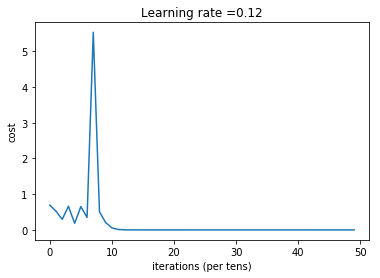

Training
Accuracy: 1.0
Dev Test
Accuracy: 0.8292682926829269


In [4]:
layers_dims = [2971, 10, 15, 15, 20, 15, 10, 10,  1] 
parameters = L_layer_model(X_train.T, Y_train.T, layers_dims, num_iterations = 5000, learning_rate= 0.12, print_cost = True)
print("Training")
pred_train = predict(X_train.T, Y_train.T, parameters)
print("Dev Test")
dev_pred = predict(X_dev.T, Y_dev.T, parameters)

test_predictions = predict_test(X_test.T, parameters)
test_predictions = test_predictions.astype(int)
test_predictions = pd.Series(test_predictions[0], name="Survived")
results = pd.concat([pd.Series(df_test['PassengerId'], name='PassengerId') ,test_predictions],axis=1)
results.to_csv("results1.csv",index=False)

Cost after iteration 0: 0.693843
Cost after iteration 100: 0.382651
Cost after iteration 200: 0.253360
Cost after iteration 300: 1.147519
Cost after iteration 400: 0.019795
Cost after iteration 500: 0.001183
Cost after iteration 600: 0.000473
Cost after iteration 700: 0.000275
Cost after iteration 800: 0.000188
Cost after iteration 900: 0.000140
Cost after iteration 1000: 0.000111
Cost after iteration 1100: 0.000091
Cost after iteration 1200: 0.000076
Cost after iteration 1300: 0.000066
Cost after iteration 1400: 0.000058
Cost after iteration 1500: 0.000051
Cost after iteration 1600: 0.000046
Cost after iteration 1700: 0.000041
Cost after iteration 1800: 0.000038
Cost after iteration 1900: 0.000035
Cost after iteration 2000: 0.000032
Cost after iteration 2100: 0.000030
Cost after iteration 2200: 0.000028
Cost after iteration 2300: 0.000026
Cost after iteration 2400: 0.000024
Cost after iteration 2500: 0.000023
Cost after iteration 2600: 0.000021
Cost after iteration 2700: 0.000020
Cost

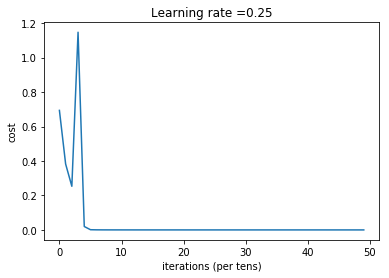

Training:
Accuracy: 1.0
Dev Test
Accuracy: 0.853658536585366


In [5]:
layers_dims = [2971, 25, 25, 40, 40, 25, 25, 1] 
parameters = L_layer_model(X_train.T, Y_train.T, layers_dims, num_iterations = 5000, learning_rate= 0.25, print_cost = True)
print("Training:")
pred_train = predict(X_train.T, Y_train.T, parameters)
print("Dev Test")
dev_pred = predict(X_dev.T, Y_dev.T, parameters)

# Kaggle Score: 0.70334
test_predictions = predict_test(X_test.T, parameters)
test_predictions = test_predictions.astype(int)
test_predictions = pd.Series(test_predictions[0], name="Survived")
results = pd.concat([pd.Series(df_test['PassengerId'], name='PassengerId') ,test_predictions],axis=1)
results.to_csv("results2.csv",index=False)